<a href="https://colab.research.google.com/github/mixa15341/Deep_Learning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B9_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9%2C_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_BatchNormalization()_%D0%B8_Dropout().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

## Задание 1. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout():

### 1.1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки:

*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
import numpy
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import backend as K

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 14s 0us/step


### 1.2. Визуализируйте несколько изображений из датасета:


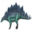

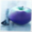

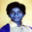

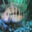

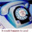

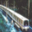

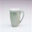

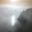

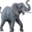

In [ ]:
for i in range(1, 10):
    cv2_imshow(x_train[i])

### 1.3. Произведите нормализацию данных:

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

### 1.4. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout():

Имя данной модели: model_1

In [ ]:
# Create a sequential model
model_1 = Sequential()

# Add convolutional layers
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_1.add(Flatten())

# Add fully connected layers
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(100, activation='softmax'))
model_1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [ ]:
batch_size = 128
epochs = 5

Обучите созданную модель

In [ ]:
model_1_history = model_1.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 4s 11ms/step - loss: 1.6001 - accuracy: 0.5667 - val_loss: 2.5397 - val_accuracy: 0.3860
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 1.3169 - accuracy: 0.6331 - val_loss: 2.6486 - val_accuracy: 0.3934
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 1.0575 - accuracy: 0.6973 - val_loss: 2.9701 - val_accuracy: 0.3736
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 0.8130 - accuracy: 0.7608 - val_loss: 3.2930 - val_accuracy: 0.3707
Epoch 5/5
391/391 [==============================] - 6s 14ms/step - loss: 0.5994 - accuracy: 0.8205 - val_loss: 3.8089 - val_accuracy: 0.3702


### 1.5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization():

Имя данной модели: model_2

In [ ]:
# Create a sequential model
model_2 = Sequential()

# Add convolutional layers
model_2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_2.add(Flatten())

# Add fully connected layers
model_2.add(BatchNormalization())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(100, activation='softmax'))
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [ ]:
model_2_history = model_2.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 9s 12ms/step - loss: 3.3248 - accuracy: 0.2202 - val_loss: 3.7157 - val_accuracy: 0.1313
Epoch 2/5
391/391 [==============================] - 4s 11ms/step - loss: 2.4126 - accuracy: 0.3837 - val_loss: 2.7290 - val_accuracy: 0.3298
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 1.9638 - accuracy: 0.4830 - val_loss: 2.6932 - val_accuracy: 0.3638
Epoch 4/5
391/391 [==============================] - 4s 11ms/step - loss: 1.6197 - accuracy: 0.5656 - val_loss: 2.5477 - val_accuracy: 0.3941
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 1.3016 - accuracy: 0.6442 - val_loss: 2.6580 - val_accuracy: 0.3958


### 1.6. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout():

Имя данной модели: model_3

In [ ]:
# Create a sequential model
model_3 = Sequential()

# Add convolutional layers
model_3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

# Flatten the feature maps
model_3.add(Flatten())

# Add fully connected layers
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='softmax'))
model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [ ]:
model_3_history = model_3.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 10s 20ms/step - loss: 4.0911 - accuracy: 0.0689 - val_loss: 3.5954 - val_accuracy: 0.1583
Epoch 2/5
391/391 [==============================] - 6s 15ms/step - loss: 3.4432 - accuracy: 0.1765 - val_loss: 3.1079 - val_accuracy: 0.2479
Epoch 3/5
391/391 [==============================] - 6s 16ms/step - loss: 3.1180 - accuracy: 0.2336 - val_loss: 2.9019 - val_accuracy: 0.2947
Epoch 4/5
391/391 [==============================] - 5s 14ms/step - loss: 2.9084 - accuracy: 0.2774 - val_loss: 2.6727 - val_accuracy: 0.3316
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 2.7458 - accuracy: 0.3072 - val_loss: 2.5516 - val_accuracy: 0.3587


### 1.7. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
# Create a sequential model
model_4 = Sequential()

# Add convolutional layers
model_4.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_4.add(Conv2D(32, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

# Flatten the feature maps
model_4.add(Flatten())

# Add fully connected layers
model_4.add(BatchNormalization())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(BatchNormalization())
model_4.add(Dense(100, activation='softmax'))
model_4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [ ]:
model_4_history = model_4.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 9s 17ms/step - loss: 4.1077 - accuracy: 0.0966 - val_loss: 3.7248 - val_accuracy: 0.1541
Epoch 2/5
391/391 [==============================] - 6s 15ms/step - loss: 3.3491 - accuracy: 0.2009 - val_loss: 2.9462 - val_accuracy: 0.2729
Epoch 3/5
391/391 [==============================] - 7s 17ms/step - loss: 2.9713 - accuracy: 0.2652 - val_loss: 2.7673 - val_accuracy: 0.3116
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 2.7094 - accuracy: 0.3159 - val_loss: 2.6333 - val_accuracy: 0.3440
Epoch 5/5
391/391 [==============================] - 8s 19ms/step - loss: 2.5412 - accuracy: 0.3516 - val_loss: 2.3725 - val_accuracy: 0.3908


### Задание 1.8. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель:

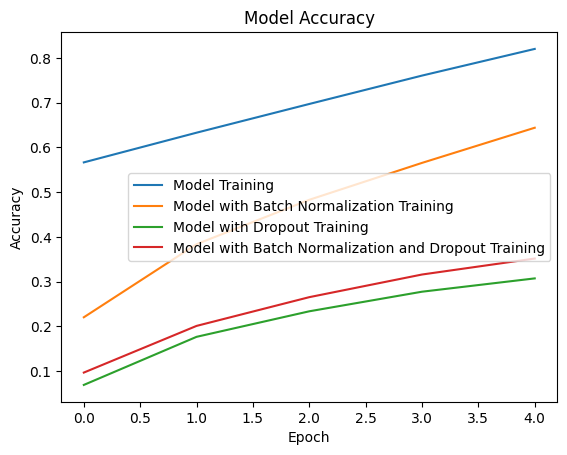

In [ ]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_4_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model Training','Model with Batch Normalization Training',
            'Model with Dropout Training', 'Model with Batch Normalization and Dropout Training'],
           loc='center right')

Ваши выводы

Ваш итог

### 1.9. Визуализируйте карты активации модели с BatchNorm() и Dropout(),отдельно по 5 классам (на Ваш выбор):

In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
def visualize_act_map(model, img):
  """
  Функция для визуализации активаций слоев модели Keras в последовательном порядке

  Args:
      model: Обученная модель Keras
      img: Изображение, преобразованное в тензор

  Returns:
      None. Визуализирует активации интересующих слоев в последовательном порядке.
  """
  # Создаем модель для активаций
  layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D))]
  activation_model = Model(inputs=model.input, outputs=layer_outputs)

  # Получаем активации
  activations = activation_model.predict(img)

  # Визуализация активаций
  for layer_activation, layer in zip(activations, model.layers):
    if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
      n_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      n_cols = n_features // 16 + int(n_features % 16 > 0)
      display_grid = np.zeros((size * n_cols, size * 16))

      for col in range(n_cols):
        for row in range(16):
            if col * 16 + row < n_features:  # Проверяем, что индекс не выходит за границы
              channel_image = layer_activation[0, :, :, col * 16 + row]
              channel_image -= channel_image.mean()

              # Добавлено исправление для RuntimeWarning: invalid value encountered in divide
              if channel_image.std() == 0:
                channel_image += 1*(10**8)

              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128

              # Добавлено исправление для RuntimeWarning: invalid value encountered in cast
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')

              display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

      scale = 1. / size
      fig, ax = plt.subplots(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
      ax.set_title(layer.name)
      ax.grid(False)
      # Используем imshow для отображения изображений
      ax.imshow(display_grid, aspect='auto', cmap='viridis')

      # Создаем границы между плитками
      for i in range(1, n_cols):
        ax.axhline(y=i * size - 0.5, color='white', linewidth=2)
      for i in range(1, 16):
        ax.axvline(x=i * size - 0.5, color='white', linewidth=2)

      plt.show()

313/313 [==============================] - 1s 3ms/step


<ipython-input-17-249c9308cbaf>:41: RuntimeWarning: divide by zero encountered in divide
  channel_image /= channel_image.std()


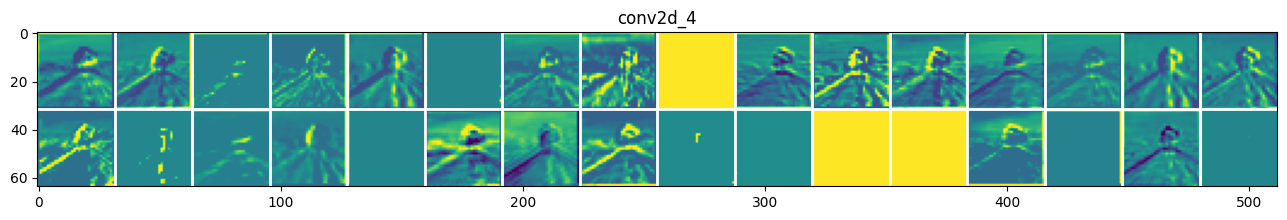

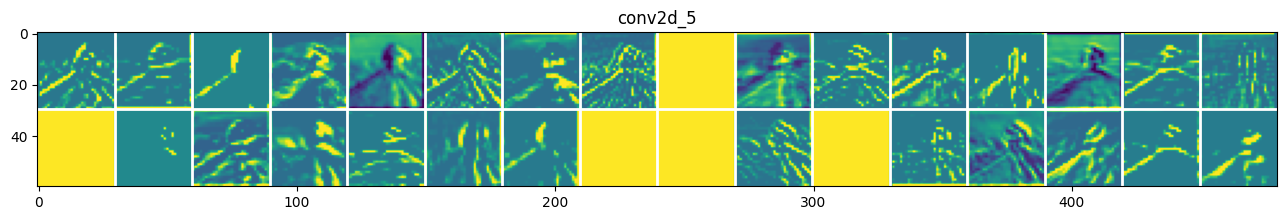

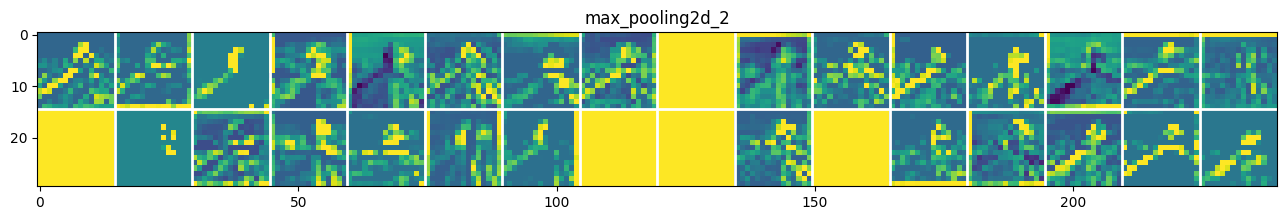

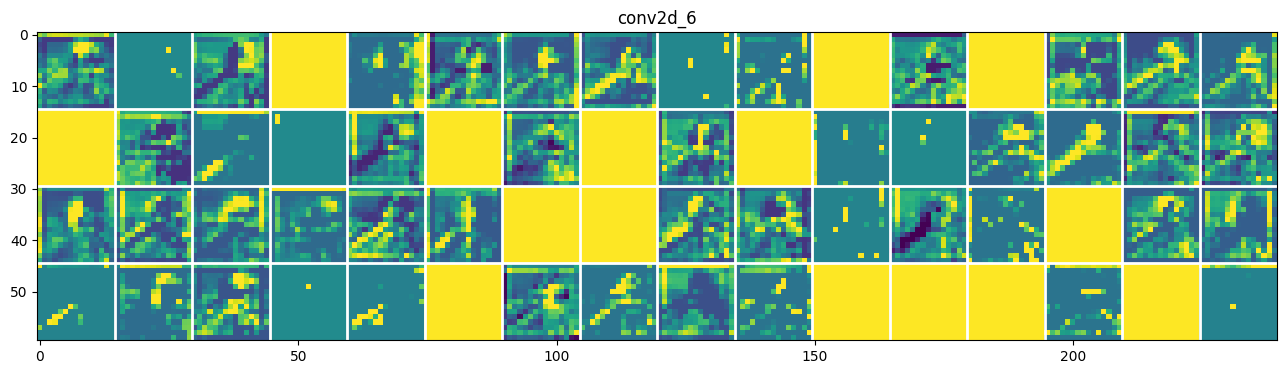

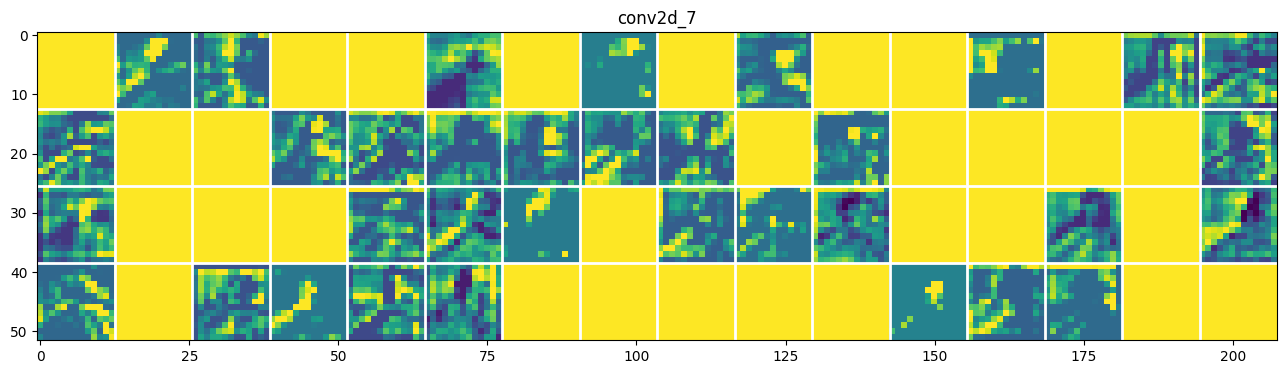

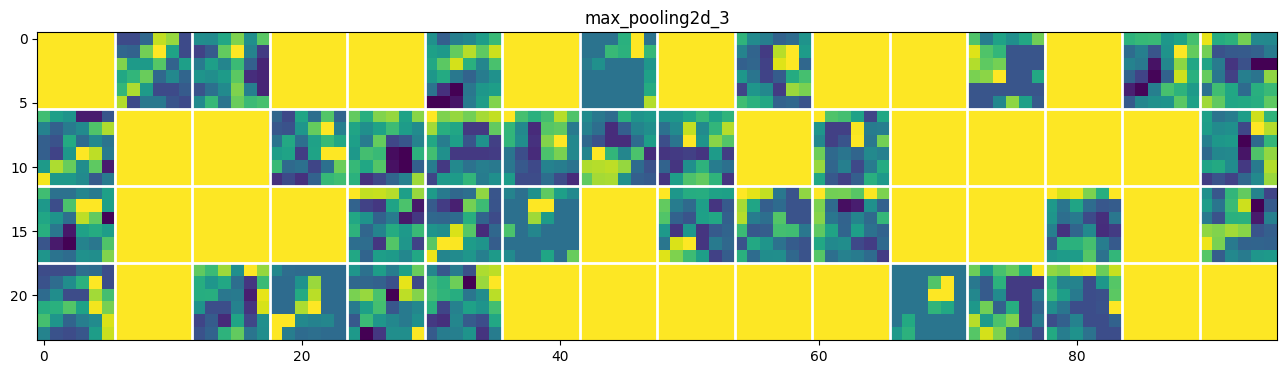

In [ ]:
visualize_act_map(model_2, x_test)

## Задание 2. Загрузите Ваш датасет из предыдущей работы. Разделите его на обучающую и тестовую выборки. Обучите модель классификации с применением BatchNorm() и Dropout(). Сравните точность с моделями, обученными Вами ранее. Визуализируйте карты активаций.

In [191]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense, Conv2D, Flatten

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
from imutils import paths
import tensorflow as tf

In [192]:
# Загружаем датасет из гугл-диска
datadir = 'Dataset'
if os.path.isdir(datadir)>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 16QT5I-QLwGczQ1nhBOLCSTc3G3RUV8fC #Скопировать ID из ссылки на файл в гугл диске, предварительно нужно открыть доступ по ссылке.
    !unzip Dataset2.zip

Data directory already exists and it is not empty, miss downloading


In [193]:
imagePaths = sorted(list(paths.list_images(datadir)))
random.shuffle(imagePaths)
def load_images(imagePaths, compression_size = 32):

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels


In [216]:
compression_size = 32

data, labels = load_images(imagePaths, compression_size)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
(trainX, valX, trainY, valY) = train_test_split(data,
	labels, test_size=0.25, random_state=28)

In [217]:
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}

trainY = np.array([label_mapping[label] for label in trainY])
valY = np.array([label_mapping[label] for label in valY])

trainY = keras.utils.to_categorical(trainY, 5)
valY = keras.utils.to_categorical(valY, 5)

print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

(1422, 32, 32, 3)
(1422, 5)
(474, 32, 32, 3)
(474, 5)


In [225]:
model_5 = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation='softmax')
])
model_5.summary()
model_5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_43 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_44 (Ba  (None, 16, 16, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_56 (Dropout)        (None, 16, 16, 64)        0         
                                                     

In [226]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=3) # Остановка обучения, если валидационная точность не улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели только при улучшении валидационной точности

In [229]:
model_5_history = model_5.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=20,
                              verbose=1,
                              validation_data=(valX, valY),
                              callbacks=[early_stopping, checkpoint])

Epoch 1/20
12/12 [==============================] - 0s 39ms/step - loss: 0.7481 - accuracy: 0.7307 - val_loss: 2.2881 - val_accuracy: 0.1983
Epoch 2/20
12/12 [==============================] - 0s 29ms/step - loss: 0.6326 - accuracy: 0.7672 - val_loss: 2.3128 - val_accuracy: 0.1983
Epoch 3/20
12/12 [==============================] - 0s 29ms/step - loss: 0.5671 - accuracy: 0.8031 - val_loss: 2.7557 - val_accuracy: 0.2278
Epoch 4/20
12/12 [==============================] - 0s 25ms/step - loss: 0.5288 - accuracy: 0.7982 - val_loss: 2.7997 - val_accuracy: 0.2637


Text(0.5, 0, 'Epoch')

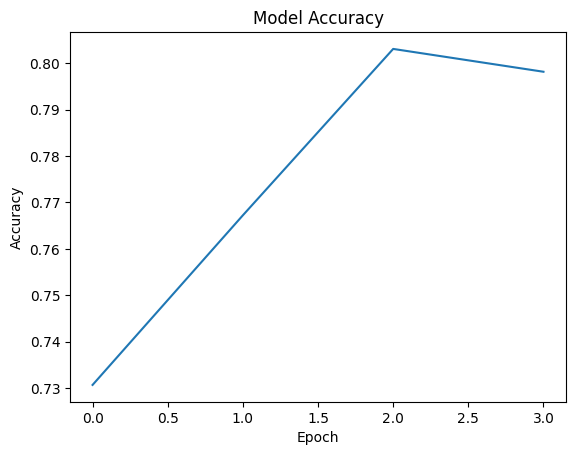

In [230]:
plt.plot(model_5_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

15/15 [==============================] - 1s 17ms/step


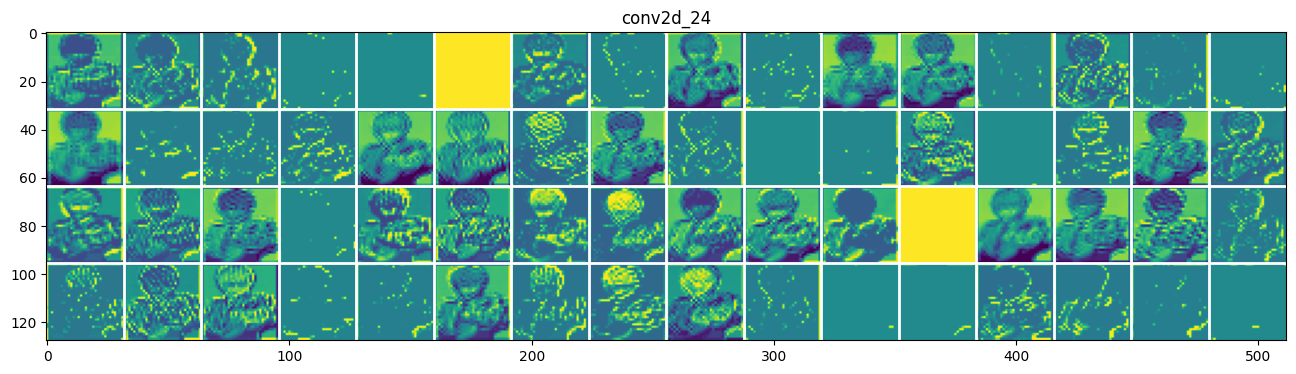

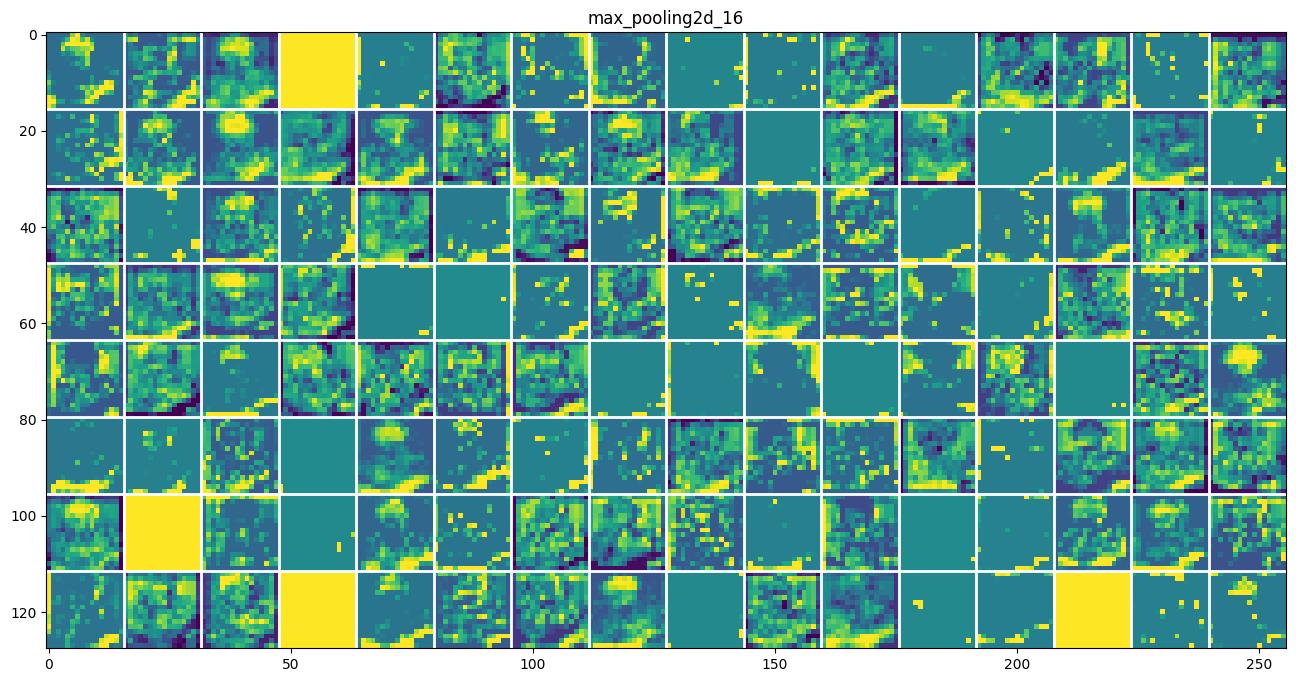

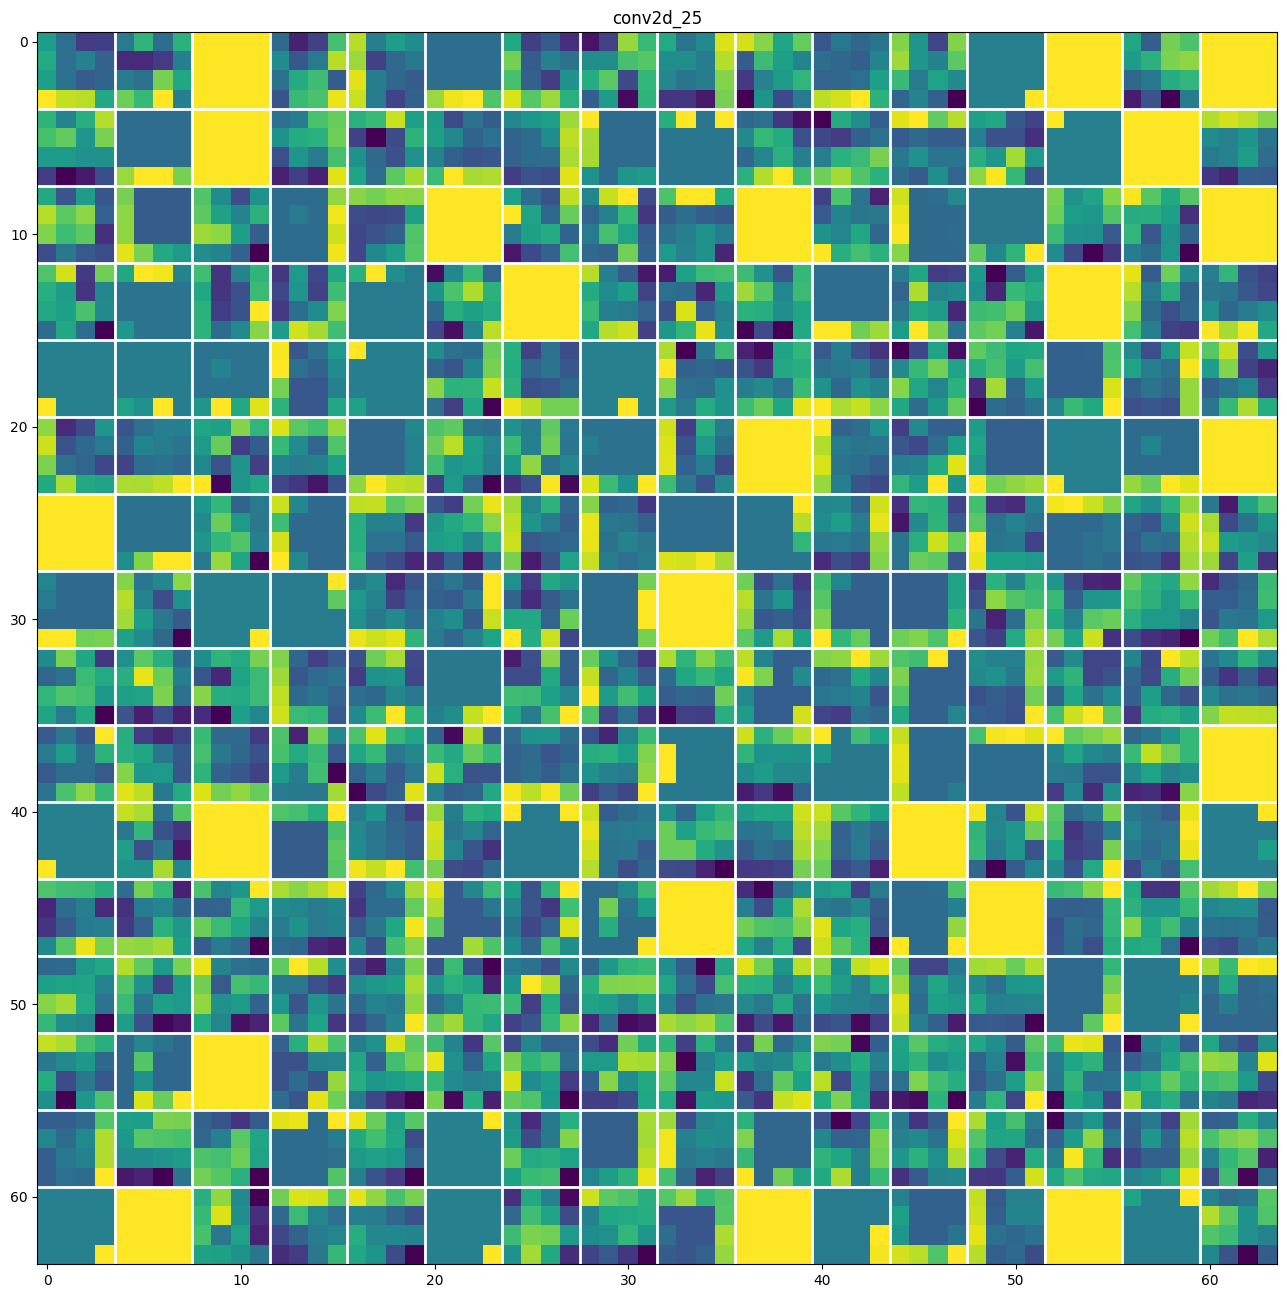

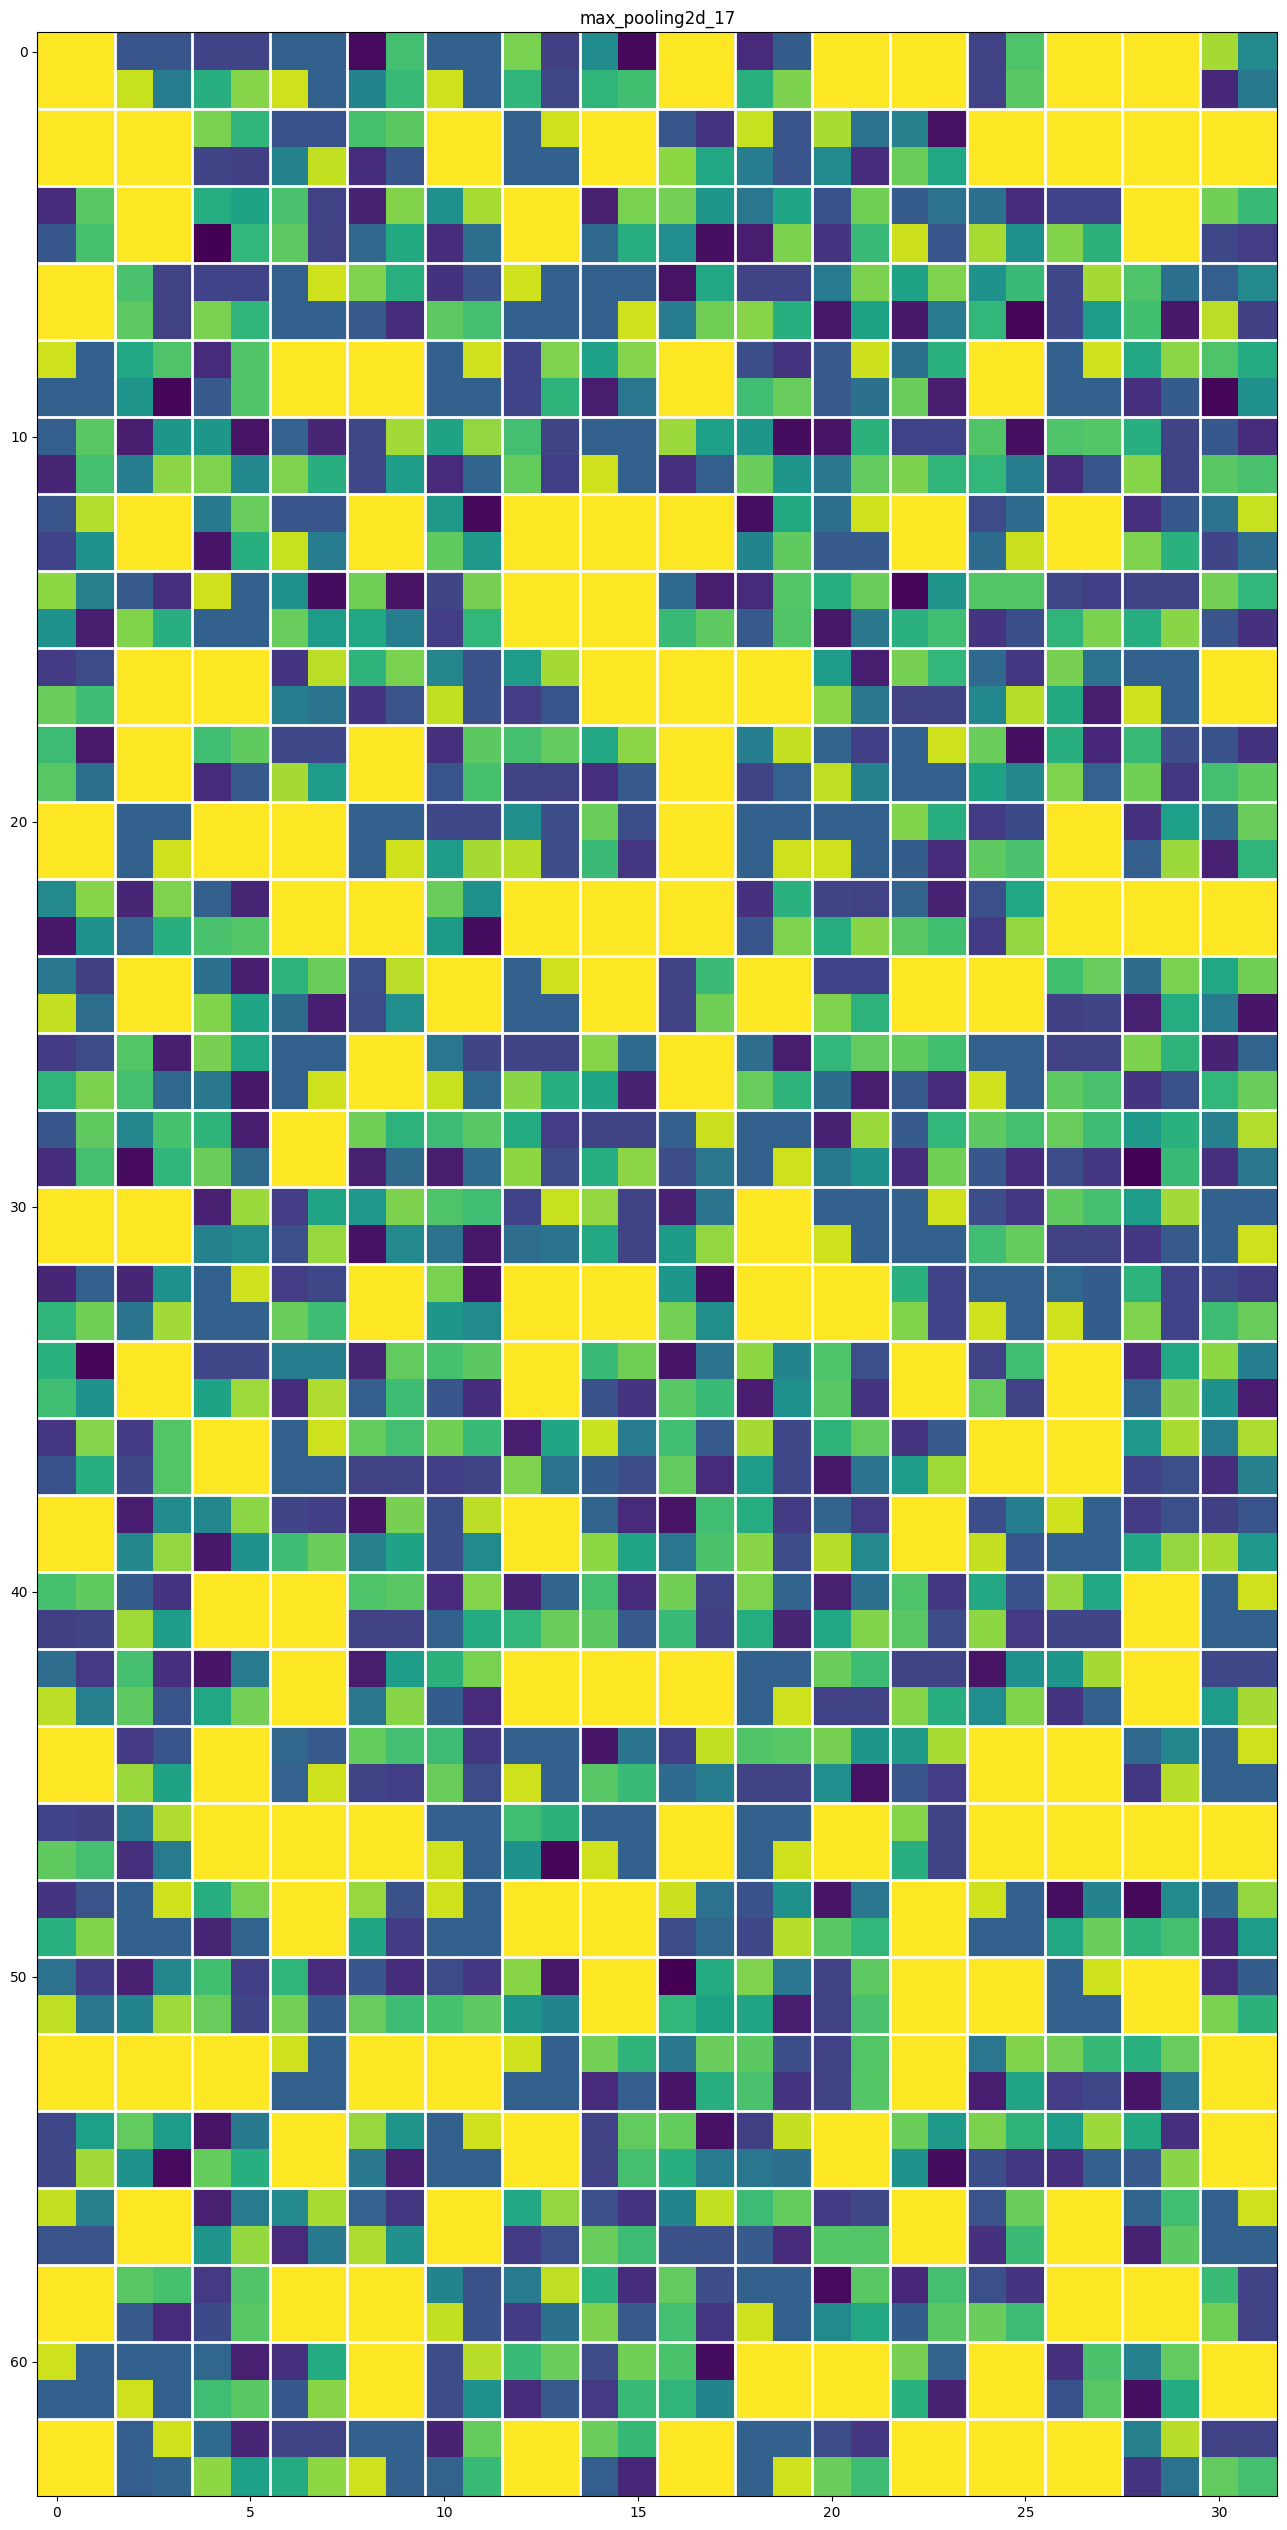

In [231]:
visualize_act_map(model_5, valX)